<a href="https://colab.research.google.com/github/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/E_20_218_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity 1**

Derive the 2-dof freedom model that will capture the first two
dominant modes of small amplitude vibration of the system.
Consider the schematic diagram of the experimental setup illustrated below along with the corresponding notations

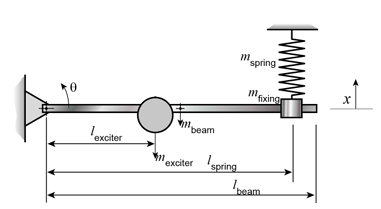

Assuming negligible damping and small-amplitude vibrations, the dynamic behavior of the system can be accurately represented by the solution of the governing partial differential equation given below

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
+ \frac{P}{\rho A}\frac{\partial^2 y}{\partial x^2}
= q(t,x)
$$


Here,
𝑦
y represents the transverse displacement of the beam,
𝑃
P is the axial compressive force,
𝜌
ρ is the material density,
𝐸
E is Young’s modulus,
𝐼
I is the second moment of area, and
𝐴
A is the cross-sectional area of the uniform beam. In this section, the axial load is assumed to be constant


since Axial force is zero, apply P = 0

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
= q(t,x)
$$


The solutions of the governing PDE that satisfy the boundary conditions

$$
y(0,t)=0, \quad y(L,t)=0,
$$

$$
\frac{\partial^2 y}{\partial x^2}(0,t)=0, \quad \frac{\partial^2 y}{\partial x^2}(L,t)=0
$$


accurately represent the physical behavior of the beam, where
𝐿
L is the beam length

$$
\text{Let } \mathcal{F} \text{ denote the infinite-dimensional vector space of twice differentiable functions defined on the interval } [0,L].
$$

$$
\text{Define the linear operator } H : \mathcal{F} \rightarrow \mathcal{F} \text{ by}
$$

$$
H = \frac{EI}{\rho A}\frac{\partial^4}{\partial x^4}.
$$

$$
\text{Then the equation of motion can be written as}
$$

$$
\frac{\partial^2 y}{\partial t^2} + Hy = q(t,x).
$$


$$
\text{The operator } H \text{ maps a transverse deflection profile to the corresponding acceleration produced solely by beam bending,}
$$

$$
\text{subject to the beam’s boundary conditions. Let } H \text{ have distinct positive eigenvalues } \{\omega_k^2\}_{k=1}^{\infty}
$$

$$
\text{with associated eigenfunctions } \{\psi_k(x)\}_{k=1}^{\infty}, \text{ which represent the vibration mode shapes.}
$$

$$
\text{The corresponding eigenvalue problem is defined as}
$$

$$
H\psi_k(x) = \omega_k^2 \psi_k(x).
$$

$$
\text{Substituting the expression for } H, \text{ we obtain}
$$

$$
\frac{EI}{\rho A}\frac{d^4 \psi_k(x)}{dx^4} = \omega_k^2 \psi_k(x).
$$

$$
\text{This can be rearranged as}
$$

$$
\frac{d^4 \psi_k(x)}{dx^4} = \frac{\rho A \omega_k^2}{EI}\psi_k(x)
= \beta_k^4 \psi_k(x).
$$


General solution for 4th order differential equation

$$
\frac{d^4 \psi(x)}{dx^4} = \beta^4 \psi(x)
$$

$$
\psi(x) = C_1 e^{\beta x} + C_2 e^{-\beta x}
+ C_3 \cos(\beta x) + C_4 \sin(\beta x)
$$


$$
\psi(x) = C_1 e^{\beta x} + C_2 e^{-\beta x}
+ C_3 \cos(\beta x) + C_4 \sin(\beta x)
$$

$$
\psi(0)= C_1 + C_2 + C_3 = 0
$$

$$
\psi'(0)= \beta(C_1 - C_2 + C_4)=0
$$

$$
\psi''(L)= C_1 e^{\beta L} + C_2 e^{-\beta L}
- C_3 \cos(\beta L) - C_4 \sin(\beta L)=0
$$

$$
\psi'''(L)= C_1 e^{\beta L} - C_2 e^{-\beta L}
+ C_3 \sin(\beta L) - C_4 \cos(\beta L)=0
$$


$$
\text{The above equations form a linear homogeneous system:}
$$

$$
H(\beta)
\begin{bmatrix}
C_1\\
C_2\\
C_3\\
C_4
\end{bmatrix}
= 0
$$

$$
\text{where } H(\beta) \in \mathbb{M}_{4\times 4}
$$

$$
H(\beta)=
\begin{bmatrix}
1 & 1 & 1 & 0\\
1 & -1 & 0 & 1\\
e^{\beta L} & e^{-\beta L} & -\cos(\beta L) & -\sin(\beta L)\\
e^{\beta L} & -e^{-\beta L} & \sin(\beta L) & -\cos(\beta L)
\end{bmatrix}
$$


Characteristic determinant

In [ ]:
import numpy as np
from numpy.linalg import det
from scipy.optimize import brentq
from scipy.linalg import svd
import matplotlib.pyplot as plt


# ========= Characteristic Determinant =========
def char_det(beta, L):
    bL = beta * L

    H = np.array([
        [1,  1,  1,  0],
        [1, -1,  0,  1],
        [np.exp(bL), np.exp(-bL), -np.cos(bL), -np.sin(bL)],
        [np.exp(bL),-np.exp(-bL),  np.sin(bL), -np.cos(bL)]
    ])

    return det(H)


Root finder for β values

In [ ]:
def find_betas(L, n_roots=2, beta_max=40):
    betas = []
    beta_vals = np.linspace(0.1, beta_max, 5000)

    f_vals = [char_det(b, L) for b in beta_vals]

    for i in range(len(beta_vals)-1):
        if f_vals[i] * f_vals[i+1] < 0:
            root = brentq(char_det, beta_vals[i], beta_vals[i+1], args=(L,))
            betas.append(root)

            if len(betas) >= n_roots:
                break

    return np.array(betas)


Solve for coefficients
𝐶
1
,
𝐶
2
,
𝐶
3
,
𝐶
4

	​


	​


In [ ]:
# ========= Mode Shape Coefficients =========
def mode_shape_coefficients(beta, L):
    bL = beta * L

    H = np.array([
        [1,  1,  1,  0],
        [1, -1,  0,  1],
        [np.exp(bL), np.exp(-bL), -np.cos(bL), -np.sin(bL)],
        [np.exp(bL),-np.exp(-bL),  np.sin(bL), -np.cos(bL)]
    ])

    # SVD to get null-space vector
    U, S, Vh = svd(H)
    v = Vh[-1, :]   # smallest singular value vector

    C1, C2, C3, C4 = v
    return C1, C2, C3, C4


In [ ]:
# Beam length
L = 1.0

# Find first two beta roots
betas = find_betas(L, n_roots=2)

print("Natural beta values:")
print(betas)

# Find mode shape coefficients
for i, beta in enumerate(betas):
    C1, C2, C3, C4 = mode_shape_coefficients(beta, L)
    print(f"\nMode {i+1}: beta = {beta:.4f}")
    print(f"C1 = {C1:.4f}, C2 = {C2:.4f}, C3 = {C3:.4f}, C4 = {C4:.4f}")


Natural beta values:
[1.87510407 4.69409113]

Mode 1: beta = 1.8751
C1 = -0.0875, C2 = -0.5707, C3 = 0.6582, C4 = -0.4832

Mode 2: beta = 4.6941
C1 = 0.0053, C2 = -0.5773, C3 = 0.5720, C4 = -0.5826


$$
\text{The eigenvalues of the operator } H \text{ are given by}
$$

$$
\{\omega_k^2\}_{k=1}^{\infty}
=
\left\{
\frac{EI}{\rho A}\beta_k^4
\right\}_{k=1}^{\infty},
$$

$$
\text{where the parameters } \beta_k \text{ are obtained from the numerical solution of the characteristic equation.}
$$

$$
\text{The corresponding eigenfunctions (mode shapes) are}
$$

$$
\{\psi_k(x)\}_{k=1}^{\infty}
=
\left\{
C_{1k} e^{\beta_k x}
+ C_{2k} e^{-\beta_k x}
+ C_{3k} \cos(\beta_k x)
+ C_{4k} \sin(\beta_k x)
\right\}_{k=1}^{\infty},
$$

$$
\text{where the constants } C_{1k}, C_{2k}, C_{3k}, \text{ and } C_{4k}
\text{ are computed using the numerical procedure implemented above.}
$$


**Forced Vibration**

When the oscillator is switched on, the system experiences forced vibration as a result of the oscillating force
𝑄
Q.

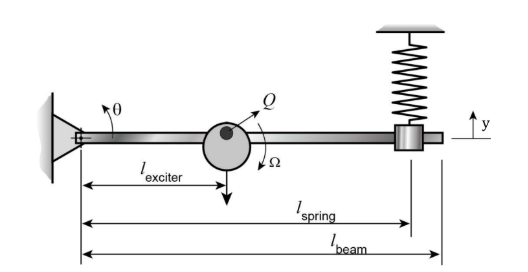